In [13]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Wall time: 0 ns


## Load Database/Import Data 

In [14]:
df = pd.read_csv("diamonds.csv")

In [15]:
df.sort_values('table')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11368,11369,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
35633,35634,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
5979,5980,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
22701,22702,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
25179,25180,2.00,Fair,H,SI1,61.2,50.0,13764,8.17,8.08,4.97
...,...,...,...,...,...,...,...,...,...,...,...
52861,52862,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52860,52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
51342,51343,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
50773,50774,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58


In [16]:
df.drop(df.columns[0],axis = 1, inplace = True)

In [17]:
# #Drop x and z, who highly dependent on y, redundant
# df.drop(df[['x']],axis = 1, inplace = True)
# df.drop(df[['z']],axis = 1, inplace = True)

In [18]:
df = df[[c for c in df if c not in ['price']] + ['price']]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


dropping row with 0 values

In [20]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
10167,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,4731
11182,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,5139
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
15951,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
24394,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631


In [22]:
df[df['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
11963,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.0,0.0,5139
15951,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381
24520,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.0,0.0,12800
26243,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.0,0.0,15686
27429,2.25,Premium,H,SI2,62.8,59.0,0.0,0.0,0.0,18034
49556,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
49557,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130


In [21]:
df[df['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
11182,1.07,Ideal,F,SI2,61.6,56.0,0.0,6.62,0.0,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.00,0.0,5139
15951,1.14,Fair,G,VS1,57.5,67.0,0.0,0.00,0.0,6381
24520,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.00,0.0,12800
26243,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.00,0.0,15686
27429,2.25,Premium,H,SI2,62.8,59.0,0.0,0.00,0.0,18034
49556,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130
49557,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130


In [9]:
#drop the rows with value 0 in x,y,z
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

In [10]:
df.shape

(53933, 8)

In [11]:
#remove outliers
df = df[(df["table"]<75) & (df["table"] > 45)]
#remove outliers
df = df[(df["y"]<30)] 
#remove outliers
df = df[(df["depth"]<75)&(df["depth"]>45)] 

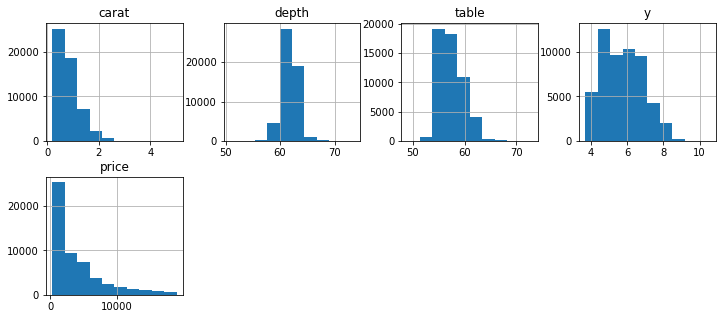

In [12]:
df.hist(figsize=(12,5), layout=(2,4))
plt.show()

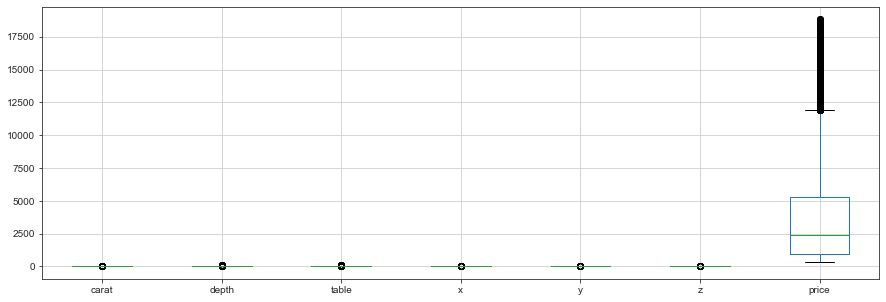

In [15]:
df.boxplot(figsize=(15,5))
plt.show()

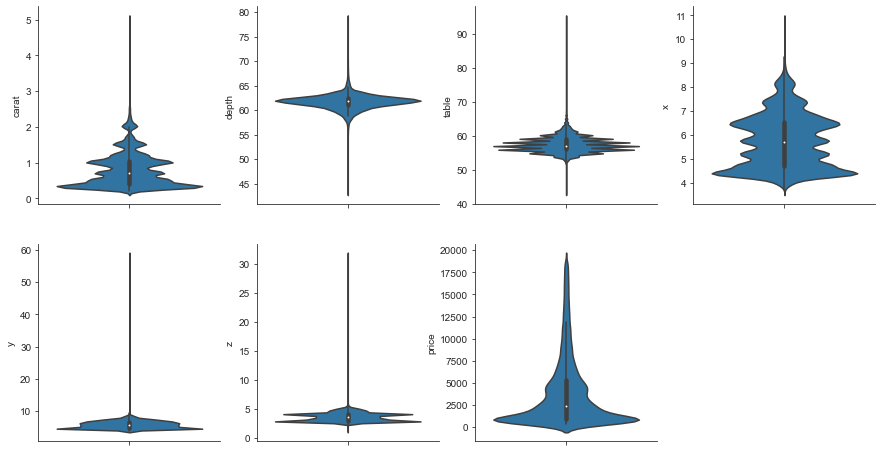

In [16]:
features = list(df.columns)[0:1] + list(df.columns)[4:]

plt.figure(figsize=(15, 8))
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.violinplot(data=df, y=feature)  
    
sns.despine()

In [18]:
df.isna().any().any()
# df.isna().sum()

False

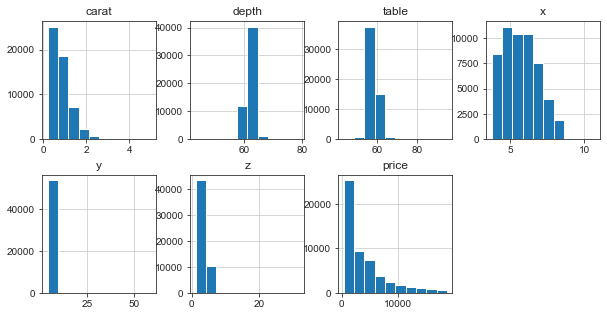

In [21]:
df.hist(figsize=(10,5), layout=(2,4))
plt.show()

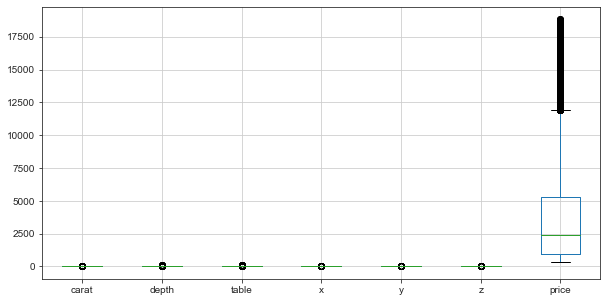

In [22]:
df.boxplot(figsize=(10,5))
plt.show()

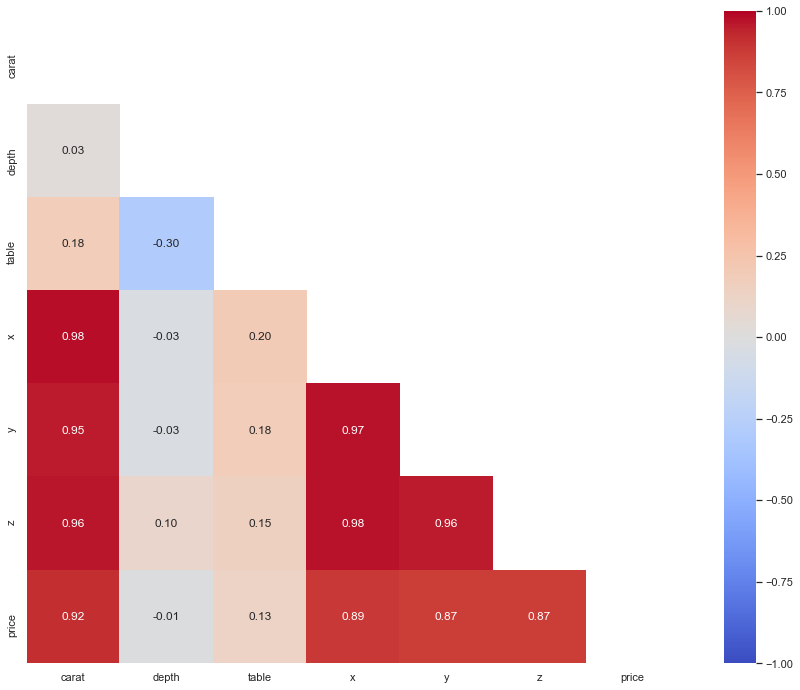

In [23]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(16,12))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

Wall time: 5.58 s


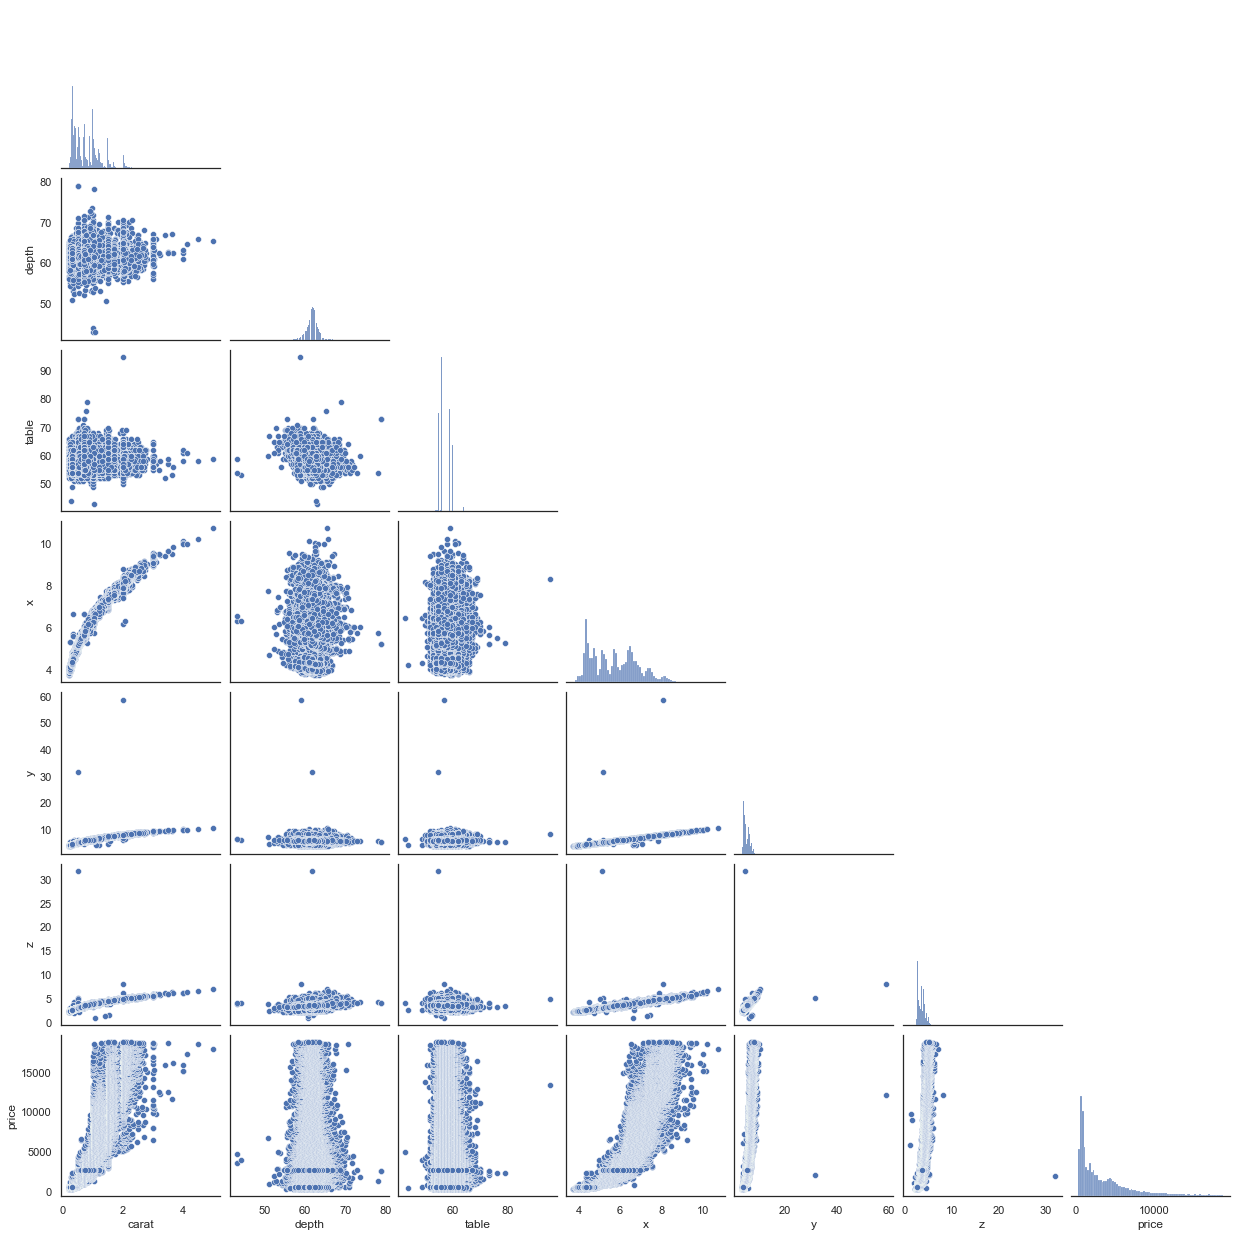

In [24]:
%%time
_ = sns.pairplot(df, corner=True, palette = 'inferno')

# g = sns.pairplot(df, diag_kind="kde")
# g.map_lower(sns.kdeplot, levels=4,corner = True, color=".2")

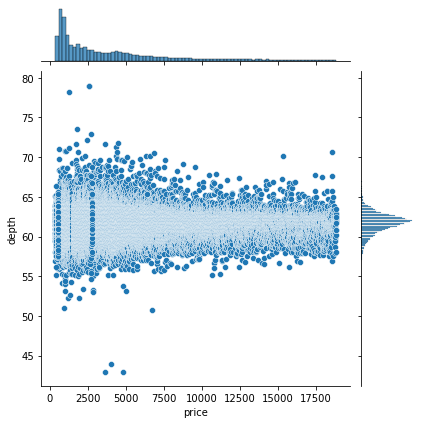

In [10]:
_ = sns.jointplot(x="price", y="depth", data=df)

In [11]:
#remove outliers
df = df[(df["depth"]<75)&(df["depth"]>45)] 

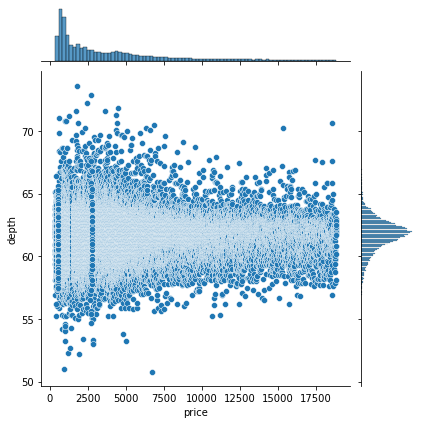

In [12]:
_ = sns.jointplot(x="price", y="depth", data=df)

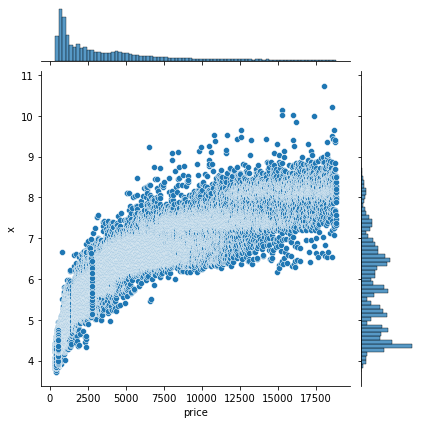

In [13]:
_ = sns.jointplot(x="price", y="x", data=df)

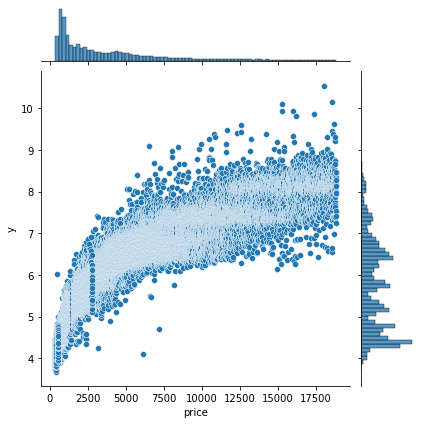

In [16]:
_ = sns.jointplot(x="price", y="y", data=df)

In [15]:
#remove outliers
df = df[(df["y"]<30)] 

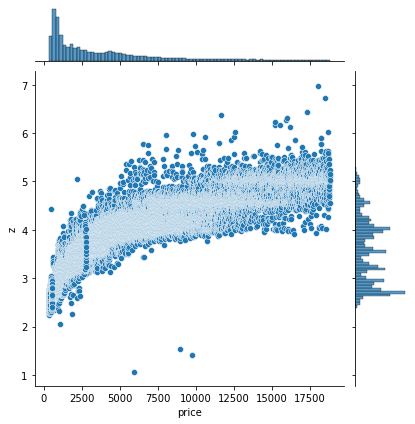

In [19]:
_ = sns.jointplot(x="price", y="z", data=df)

In [18]:
#remove outliers
df = df[(df["z"]<30)]

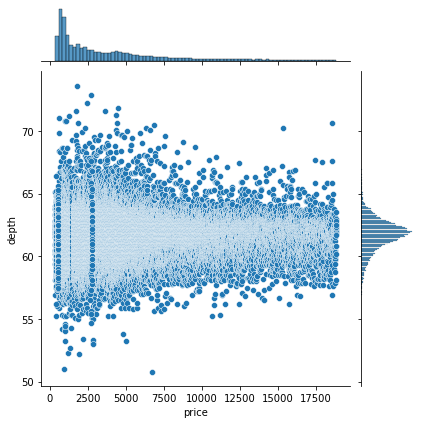

In [20]:
_ = sns.jointplot(x="price", y="depth", data=df)

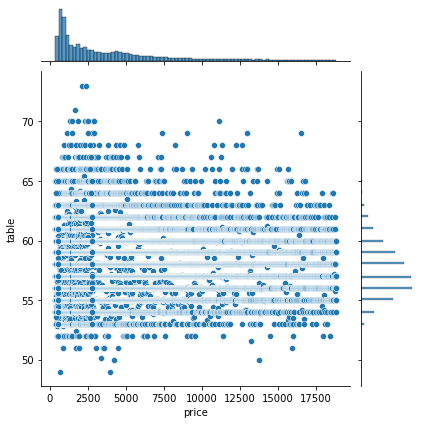

In [25]:
_ = sns.jointplot(x="price", y="table", data=df)

In [24]:
#remove outliers
df = df[(df["table"]<75) & (df["table"] > 45)]

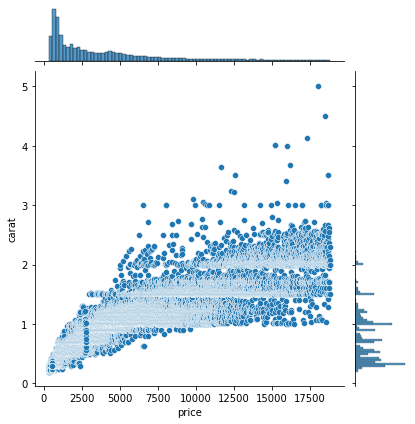

In [27]:
_ = sns.jointplot(x="price", y="carat", data=df)

Wall time: 4.31 s


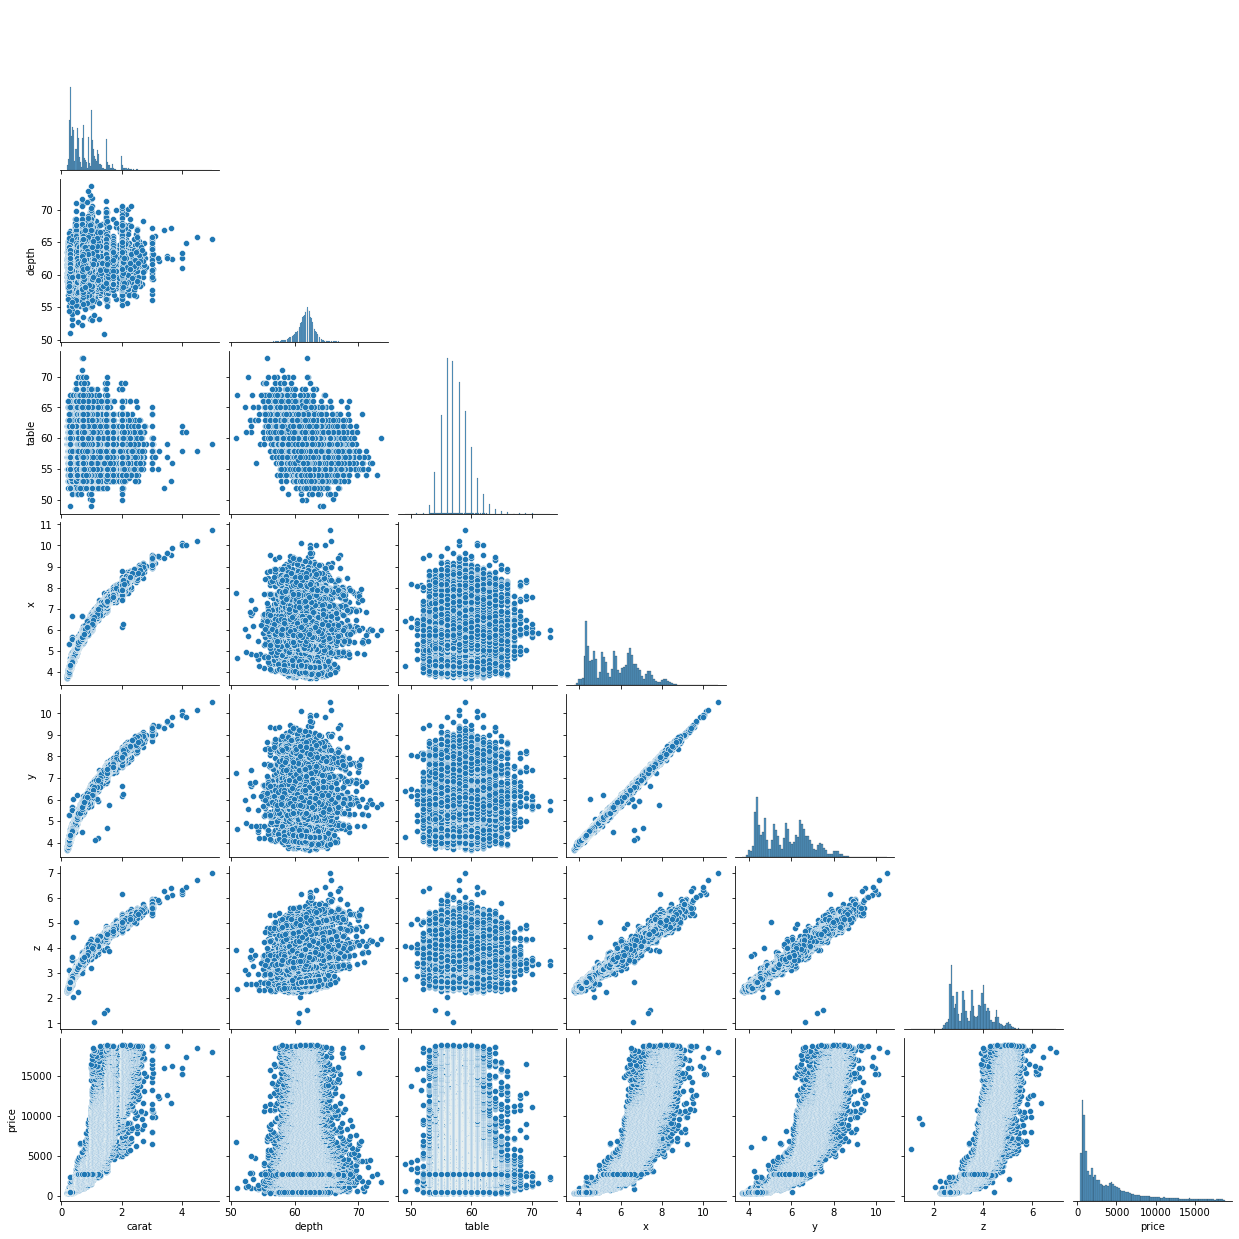

In [26]:
%%time
_ = sns.pairplot(df, corner=True, palette = 'inferno')

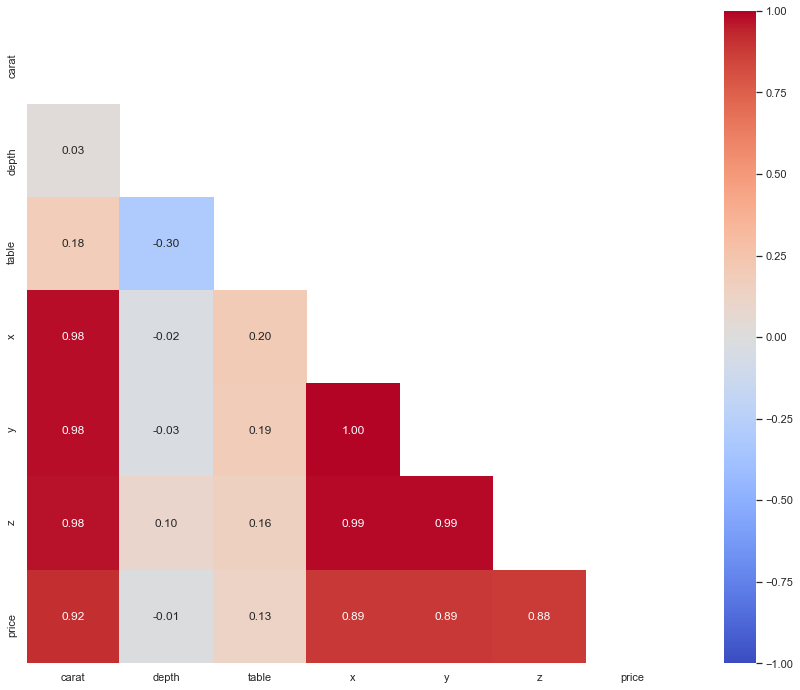

In [28]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(16,12))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

In [20]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            553
y            550
z            374
price      11597
dtype: int64

In [21]:
df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2240
0.70    1981
0.32    1840
        ... 
2.71       1
3.11       1
3.50       1
3.67       1
3.51       1
Name: carat, Length: 273, dtype: int64

In [22]:
df['depth'].value_counts()

62.0    2239
61.9    2163
61.8    2077
62.2    2038
62.1    2019
        ... 
52.2       1
71.2       1
72.9       1
53.1       1
53.0       1
Name: depth, Length: 184, dtype: int64

In [23]:
df['table'].value_counts()

56.0    9879
57.0    9724
58.0    8366
59.0    6565
55.0    6268
        ... 
64.2       1
79.0       1
64.3       1
63.3       1
65.4       1
Name: table, Length: 127, dtype: int64

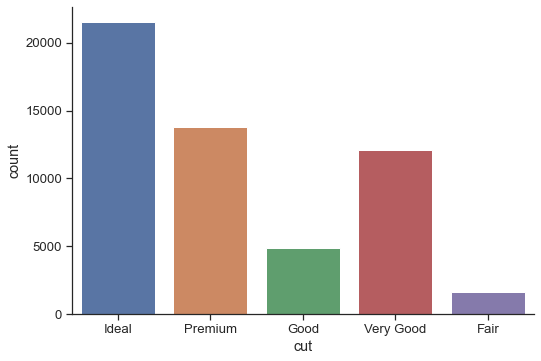

In [38]:
_ = sns.factorplot(x='cut', data=df , kind='count',aspect=1.5) 

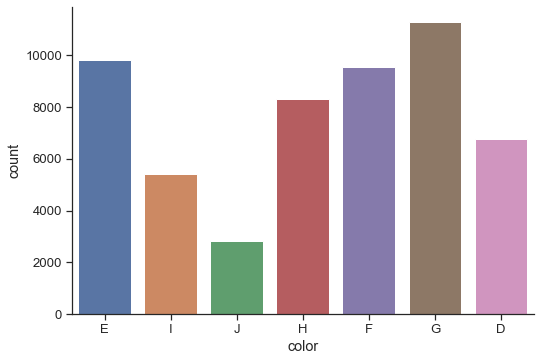

In [46]:
_ = sns.factorplot(x='color', data=df , kind='count',aspect=1.5) 

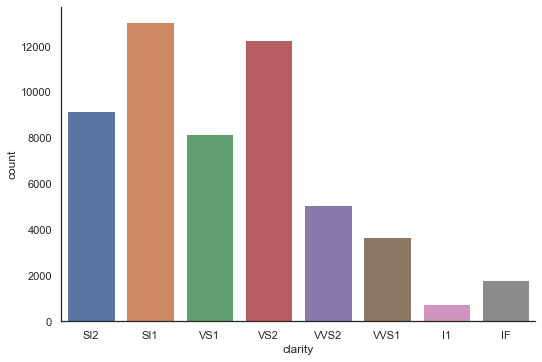

In [30]:
_ = sns.factorplot(x='clarity', data=df , kind='count',aspect=1.5) 

In [35]:
features = list(df.columns)[1:4]

In [36]:
print(features)

['cut', 'color', 'clarity']


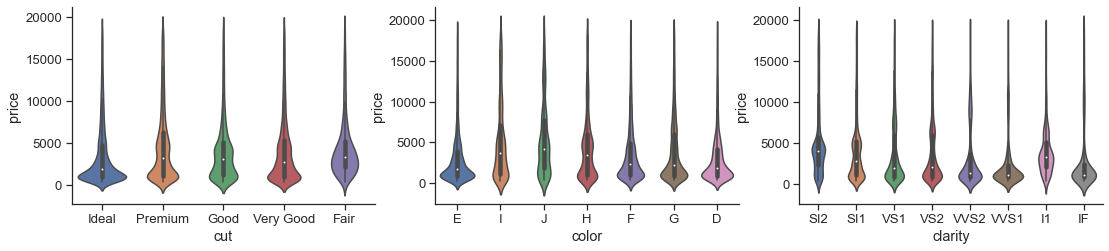

In [40]:
features = list(df.columns)[1:4]

plt.figure(figsize=(25, 8))
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.violinplot(data=df, x=feature, y='price')  
    
sns.despine()

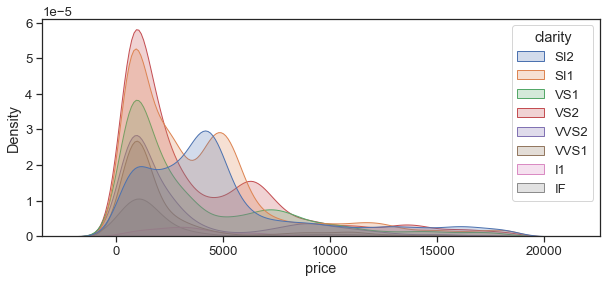

In [30]:
plt.figure(figsize=(10, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
_ = sns.kdeplot(data = df, x ='price', hue = 'clarity', shade=True) # bw_adjust=5

In [32]:
# plt.figure(figsize=(10, 4))
# sns.set(font_scale= 1.2)
# sns.set_style('ticks')
# _ = sns.kdeplot(data = df, x ='price', shade=True)

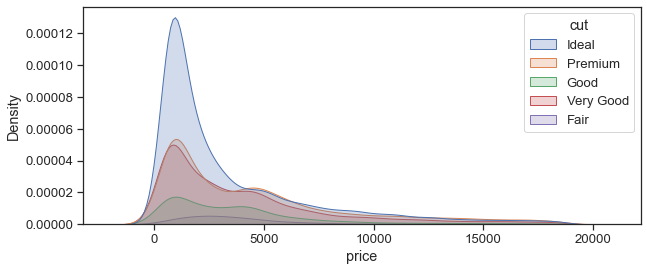

In [33]:
plt.figure(figsize=(10, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
_ = sns.kdeplot(data = df, x ='price', hue = 'cut', shade=True)

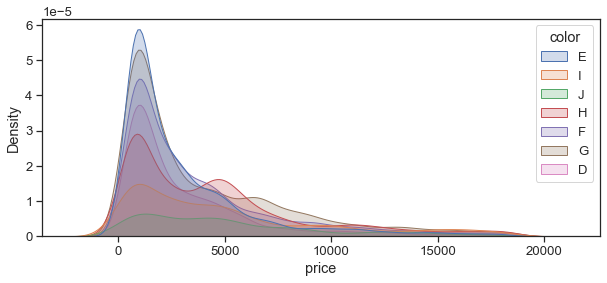

In [34]:
plt.figure(figsize=(10, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
_ = sns.kdeplot(data = df, x ='price', hue = 'color', shade=True)

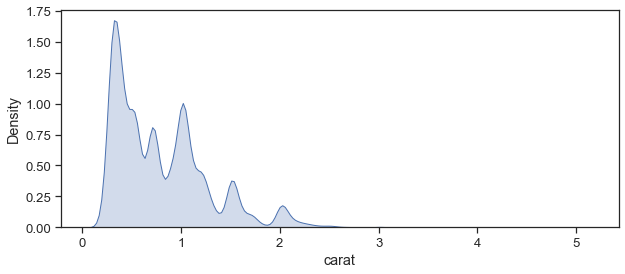

In [36]:
plt.figure(figsize=(10, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
_ = sns.kdeplot(data= df, x = 'carat', shade=True)
#_ = sns.kdeplot(data= df, x = 'carat', shade=True,bw_adjust=3) 


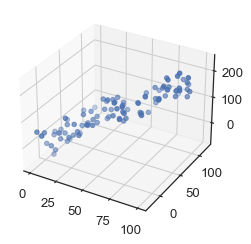

In [85]:
from mpl_toolkits.mplot3d import Axes3D

df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'],  s=20)
plt.show()
#_ = sns.jointplot(x="x", y="y", z= 'depth', data=df)

In [95]:
ggplot(df(x=cut,y=price, color=cut)) +geom_boxplot()

NameError: name 'ggplot' is not defined